# Simulación de eficiencia de fotodetectores basados en semiconductores

Autores:
- Santiago Vélez Arboleda
- César Augusto Montoya Ocampo

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from semiconductor import Semiconductor
from constants import u, Q_E

In [2]:
# Parámetros
temperatura = 300 * u.kelvin
dopajes = np.logspace(5, 24, num=200) * u.meter**-3

# Inicializar listas para almacenar resultados
E_fermi_n = []
E_fermi_p = []

# Para referencia intrínseca
semi_intrinseco = Semiconductor("Si", T=temperatura)
Ef_intrinseco = semi_intrinseco.fermi_level().to("eV").magnitude
Eg = semi_intrinseco.band_gap().to("eV").magnitude
Ev = 0.0  # Se toma como referencia
Ec = Eg   # Ev + Eg

for Nd in dopajes:
    semi_n = Semiconductor("Si", T=temperatura, N_D=Nd, N_A=0 * u.meter**-3)
    E_fermi_n.append(semi_n.fermi_level().to("eV").magnitude)

for Na in dopajes:
    semi_p = Semiconductor("Si", T=temperatura, N_D=0 * u.meter**-3, N_A=Na)
    E_fermi_p.append(semi_p.fermi_level().to("eV").magnitude)


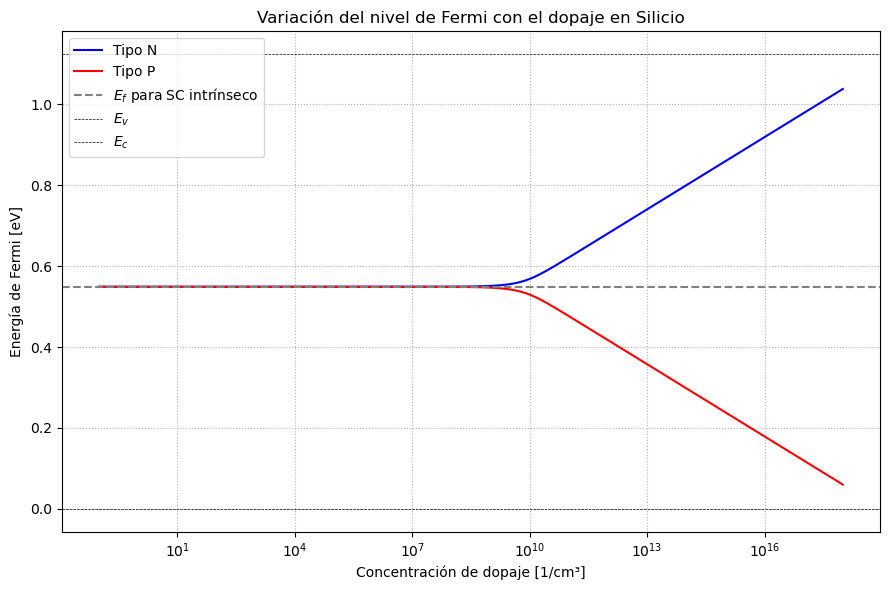

In [3]:
# Gráfica
fig, ax = plt.subplots(figsize=(9, 6))

ax.semilogx(dopajes.to("1/cm**3").magnitude, E_fermi_n, label="Tipo N", color="blue")
ax.semilogx(dopajes.to("1/cm**3").magnitude, E_fermi_p, label="Tipo P", color="red")
ax.axhline(Ef_intrinseco, linestyle="--", color="gray", label=r"$E_f$ para SC intrínseco")
ax.axhline(Ev, linestyle="--", color="black", linewidth=0.5, label=r"$E_v$")
ax.axhline(Ec, linestyle="--", color="black", linewidth=0.5, label=r"$E_c$")

ax.set_xlabel("Concentración de dopaje [1/cm³]")
ax.set_ylabel("Energía de Fermi [eV]")
ax.set_title("Variación del nivel de Fermi con el dopaje en Silicio")
ax.legend()
ax.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

In [ ]:
# Parámetros
temperaturas = np.linspace(100, 500, 30) * u.kelvin
dopaje = 1e21 * u.meter**-3  # Fijo para todos los casos

conductividades_n = []
conductividades_p = []
conductividades_mix = []

for T in temperaturas:
    # Intrínseco
    semi_intrinseco = Semiconductor("Si", T=T)
    n_n, p_n = semi_intrinseco.carrier_concentrations()
    mu_n, mu_p = semi_intrinseco.matthiesen_rule()
    sigma_intrinseco = (n_n * Q_E * mu_n + p_n * Q_E * mu_p).to("S/m")
    conductividades_intrinseco.append(sigma_intrinseco.magnitude)
    # Solo donadores (tipo N)
    semi_n = Semiconductor("Si", T=T, N_D=dopaje, N_A=0 * u.meter**-3)
    n_n, p_n = semi_n.carrier_concentrations()
    mu_n, mu_p = semi_n.matthiesen_rule()
    sigma_n = (n_n * Q_E * mu_n + p_n * Q_E * mu_p).to("S/m")
    conductividades_n.append(sigma_n.magnitude)

    # Solo aceptores (tipo P)
    semi_p = Semiconductor("Si", T=T, N_D=0 * u.meter**-3, N_A=dopaje)
    n_p, p_p = semi_p.carrier_concentrations()
    mu_n, mu_p = semi_p.matthiesen_rule()
    sigma_p = (n_p * Q_E * mu_n + p_p * Q_E * mu_p).to("S/m")
    conductividades_p.append(sigma_p.magnitude)

    # Ambos dopajes (compensación)
    semi_mix = Semiconductor("Si", T=T, N_D=dopaje, N_A=dopaje)
    n_m, p_m = semi_mix.carrier_concentrations()
    mu_n, mu_p = semi_mix.matthiesen_rule()
    sigma_mix = (n_m * Q_E * mu_n + p_m * Q_E * mu_p).to("S/m")
    conductividades_mix.append(sigma_mix.magnitude)


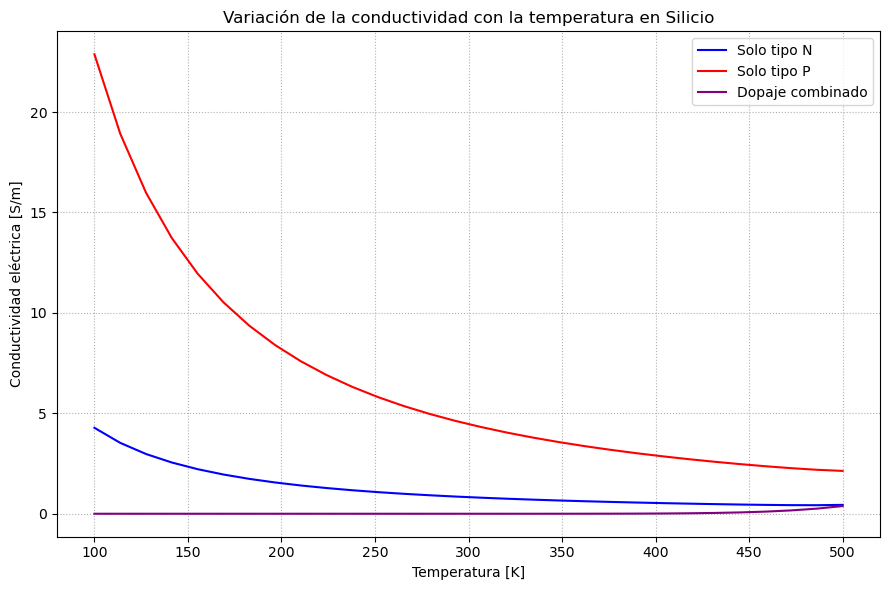

In [5]:
# Gráfica
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(temperaturas.magnitude, conductividades_n, label="Solo tipo N", color="blue")
ax.plot(temperaturas.magnitude, conductividades_p, label="Solo tipo P", color="red")
ax.plot(temperaturas.magnitude, conductividades_mix, label="Dopaje combinado", color="purple")

ax.set_xlabel("Temperatura [K]")
ax.set_ylabel("Conductividad eléctrica [S/m]")
ax.set_title("Variación de la conductividad con la temperatura en Silicio")
ax.grid(True, linestyle=":")
ax.legend()
plt.tight_layout()
plt.show()